In [3]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
file = open('./Radial_Tilt_110-120.csv','r')
rdr = csv.reader(file)
prompt = float(0)
var = [0,-0.002,0.002] #Put the proper set value in front. This may be Rrod, Hrod, Tilt angle etc. Write all the cases.
dt = np.zeros((len(var),9), dtype=object) # Angle / Freq / C / Gtot / Grod
data = dict(zip(var,dt))

for line in rdr:
   for v in var:
      if(float(line[1]) == float(v) and float(line[4])>0.05): 
         #print(float(line[0]))
         data[v][0] = np.append(data[v][0],float(line[0]))
         data[v][1] = np.append(data[v][1],float(line[2]))
         data[v][2] = np.append(data[v][2],float(line[4]))
         data[v][3] = np.append(data[v][3],float(line[-2]))
         data[v][4] = np.append(data[v][4],float(line[-1]))
for v in var:
    for i in range (5):
      data[v][i] = data[v][i][1:]
print(data[0])

[array([110. , 110.1, 110.2, 110.3, 110.4, 110.5, 110.6, 110.7, 110.8,
        110.9, 111. , 111.1, 111.2, 111.3, 111.4, 111.5, 111.6, 111.7,
        111.8, 111.9, 112. , 112.1, 112.2, 112.3, 112.4, 112.5, 112.6,
        112.7, 112.8, 112.9, 113. , 113.1, 113.2, 113.3, 113.4, 113.5,
        113.6, 113.7, 113.8, 113.9, 114. , 114.1, 114.2, 114.3, 114.4,
        114.5, 114.6, 114.7, 114.8, 114.9, 115. , 115.1, 115.2, 115.3,
        115.4, 115.5, 115.6, 115.7, 115.8, 115.9, 116. , 116.1, 116.2,
        116.3, 116.4, 116.5, 116.6, 116.7, 116.8, 116.9, 117. , 117.1,
        117.2, 117.3, 117.4, 117.5, 117.6, 117.7, 117.8, 117.9, 118. ,
        118.1, 118.2, 118.3, 118.4, 118.5, 118.6, 118.7, 118.8, 118.9,
        119. , 119.1, 119.2, 119.3, 119.4, 119.5, 119.6, 119.7, 119.8,
        119.9, 120. ])
 array([1.7773, 1.7776, 1.7778, 1.778 , 1.7783, 1.7785, 1.7788, 1.779 ,
        1.7793, 1.7796, 1.7798, 1.7801, 1.7803, 1.7806, 1.7807, 1.7811,
        1.7813, 1.7815, 1.7818, 1.7821, 1.7823, 1.78

In [4]:
def cube(x,a,b,c,d):
   return a*np.power(x,3)+b*np.power(x,2)+c*np.power(x,1)+d
def quad(x,a,b,c):
   return a*np.power(x,2)+b*np.power(x,1)+c

if (type(data[v][-2])==int):
   for v in var:
      x = data[v][1] #frequency
      y1 = data[v][2] #C
      y2 = data[v][3] #Qtot
      y3 = data[v][4] #Qrod
      popt_C, pcov_C = curve_fit(cube,x,y1)
      popt_Qtot, pcov_Qtot = curve_fit(quad,x,y2)
      popt_Qrod, pcov_Qrod = curve_fit(quad,x,y3)
      data[v][-3] = np.append(data[v][-3],popt_C)
      data[v][-3] = data[v][-3][1:]
      data[v][-2] = np.append(data[v][-2],popt_Qtot)
      data[v][-2] = data[v][-2][1:]
      data[v][-1] = np.append(data[v][-1],popt_Qrod)
      data[v][-1] = data[v][-1][1:]
#print(data[0])

Text(0.5, 1.0, 'Rod Angle v. Frequency')

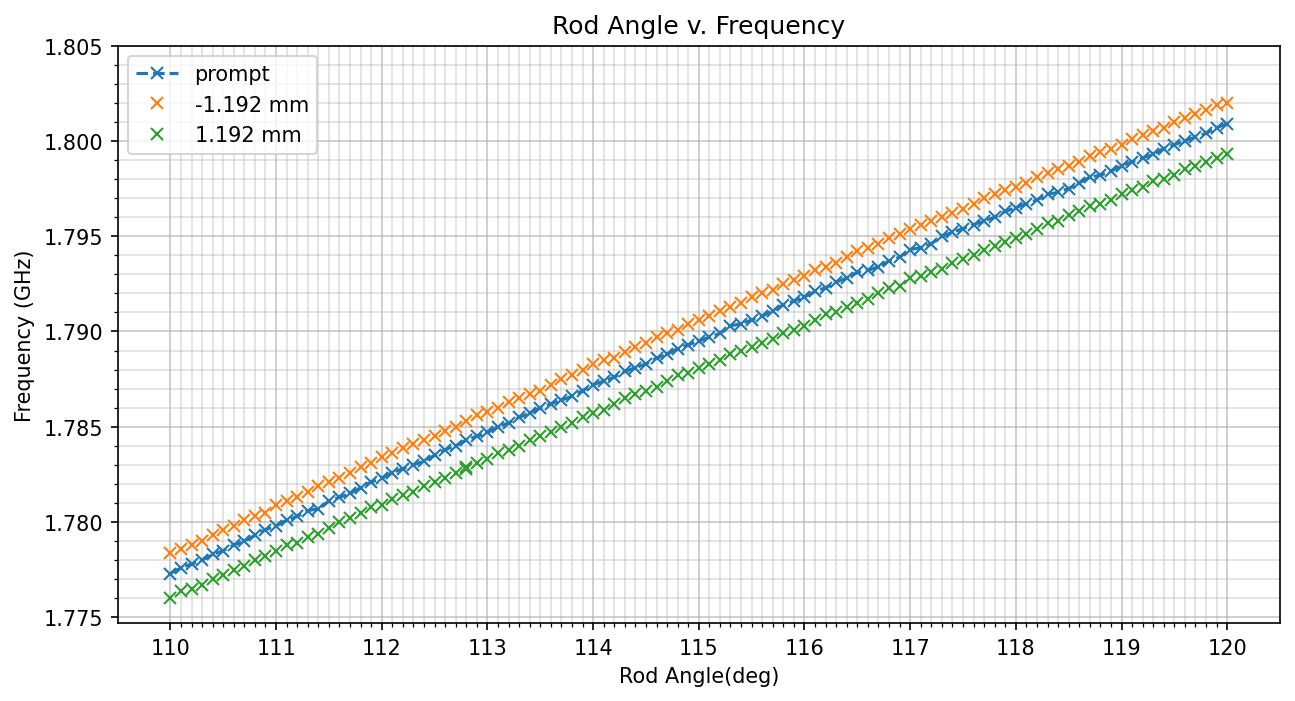

In [10]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
for v in var:
   angle = data[v][0]
   freq = data[v][1]
   if v == 0:
      label = 'prompt'
      axs.plot(angle,freq,marker='x',linestyle = '--', label = label)
   else:
      label = '%.3f mm' %(v*596)
      axs.plot(angle,freq,marker='x',linestyle='None',label=label)
axs.legend()
axs.set_xticks(np.arange(110,121,1))
axs.set_xticks(np.arange(110,120,0.1),minor=True)
axs.set_yticks(np.arange(1.775,1.805,0.005))
axs.set_yticks(np.arange(1.775,1.805,0.001),minor=True)
axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)
axs.set_xlabel("Rod Angle(deg)")
axs.set_ylabel("Frequency (GHz)")
axs.set_title("Rod Angle v. Frequency")

Text(0.5, 1.0, 'Frequency v. C/$Q_{tot}$ (Radial Tilt in mm)')

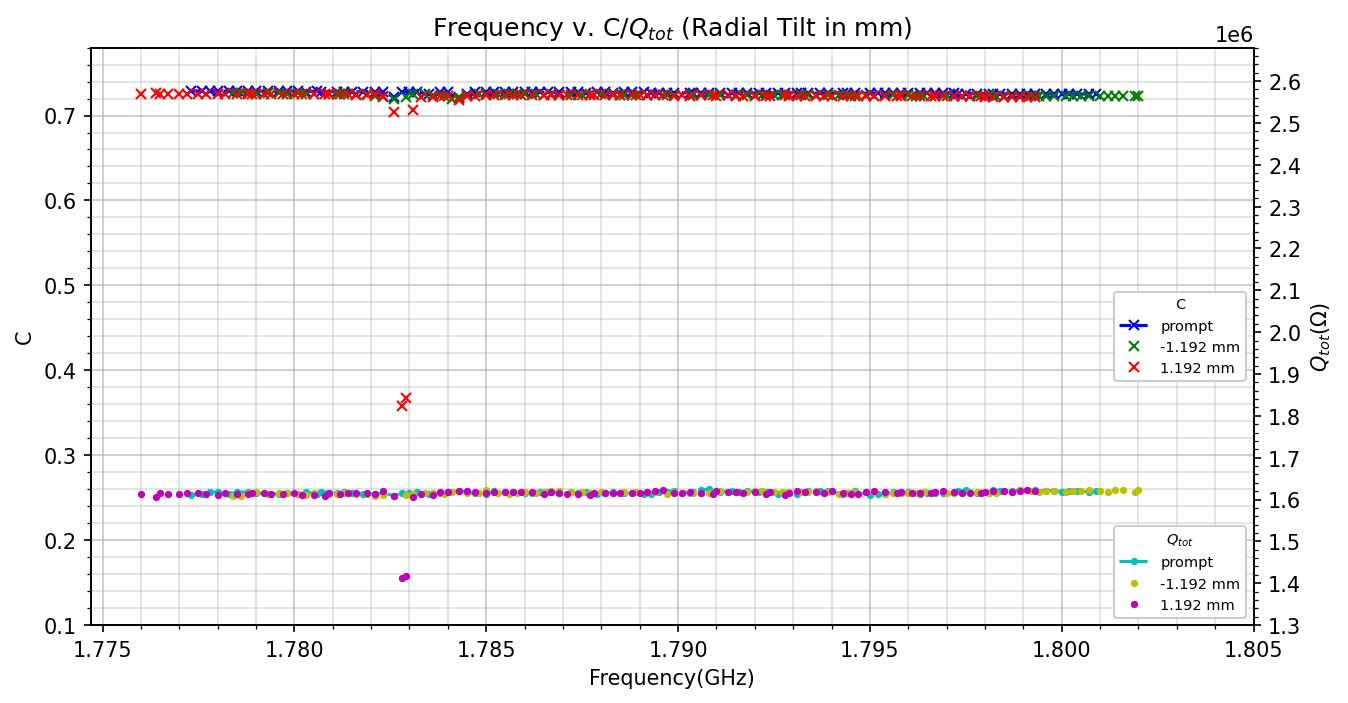

In [16]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
twin1 = axs.twinx()  

for v in var:
   freq = data[v][1] # freq
   pmt = data[v][2] # C 
   Qtot = data[v][3] # Qtot
   if v == 0:
      label = 'prompt'
      axs.plot(freq,pmt,marker='x',linestyle = '--', label = label,color='b',markersize=5)
      twin1.plot(freq,Qtot,marker='.',linestyle='--',label = label,color='c',markersize=5)
   elif v == 0.002:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label,color='r',markersize=5)
      twin1.plot(freq,Qtot,marker='.',linestyle='None',label = label,color='m',markersize=5)
   elif v == -0.002:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label,color='g',markersize=5)
      twin1.plot(freq,Qtot,marker='.',linestyle='None',label = label,color='y',markersize=5)

#Frequency
axs.set_xticks(np.arange(1.775,1.805,0.005))
axs.set_xticks(np.arange(1.775,1.805,0.001),minor=True)

#Rotation Angle
#axs.set_xticks(np.arange(100,111,1))
#axs.set_xticks(np.arange(100,110,0.1),minor=True)

axs.set_yticks(np.arange(0.1,0.8,0.1))
axs.set_yticks(np.arange(0.1,0.8,0.02),minor=True)

twin1.set_yticks(np.arange(1.3e6,2.7e6,0.1e6))
twin1.set_yticks(np.arange(1.3e6,2.7e6,0.02e6),minor=True)
axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend(title='C',title_fontsize=7,fontsize=7,loc='right',framealpha=1)
twin1.legend(title='$Q_{tot}$',title_fontsize=7,fontsize=7,loc='lower right',framealpha=1)
axs.set_ylabel('C')
axs.set_xlabel('Frequency(GHz)')
#axs.set_xlabel('Angle (°)')
twin1.set_ylabel('$Q_{tot}(\Omega)$')
axs.set_title('Frequency v. C/$Q_{tot}$ (Radial Tilt in mm)')
#axs.set_title('Rotation Angle v. C/$Q_{tot}$ (Radial Tilt in mm)')

Text(0.5, 1.0, 'G_tot v. Frequency (Radial Tilt in mm)')

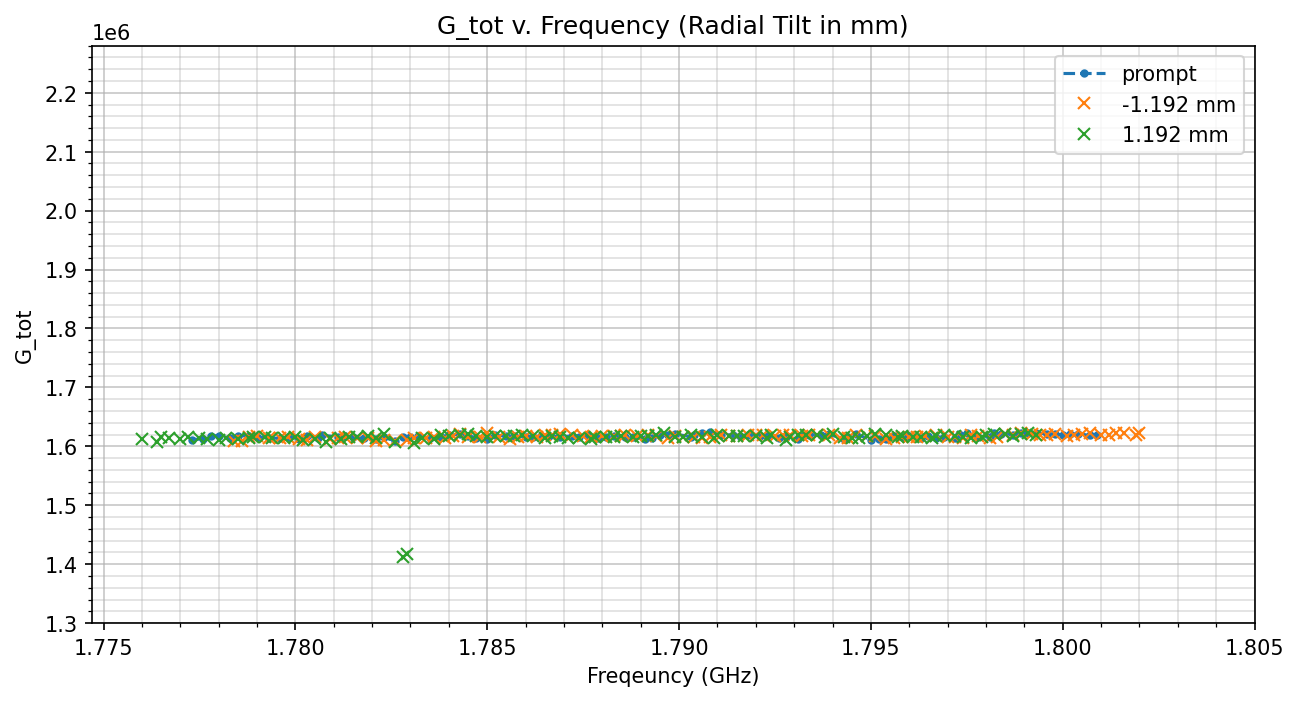

In [13]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   freq = data[v][1] # freq of prompt
   pmt = data[v][3] # Qtot of prompt
   label = '%f' % v
   if v == 0:
      label = 'prompt'
      axs.plot(freq,pmt,marker='.',linestyle = '--', label = label)
   else:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label)

axs.set_xticks(np.arange(1.775,1.805,0.005))
axs.set_xticks(np.arange(1.775,1.805,0.001),minor=True)
# axs.set_xticks(np.arange(100,111,1))
# axs.set_xticks(np.arange(100,110,0.1),minor=True)
axs.set_yticks(np.arange(1.3e6,2.3e6,0.1e6))
axs.set_yticks(np.arange(1.3e6,2.3e6,0.02e6),minor=True)

axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend()
axs.set_ylabel('G_tot')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('G_tot v. Frequency (Radial Tilt in mm)')

Text(0.5, 1.0, 'G_rod v. Frequency (Radial Tilt in mm)')

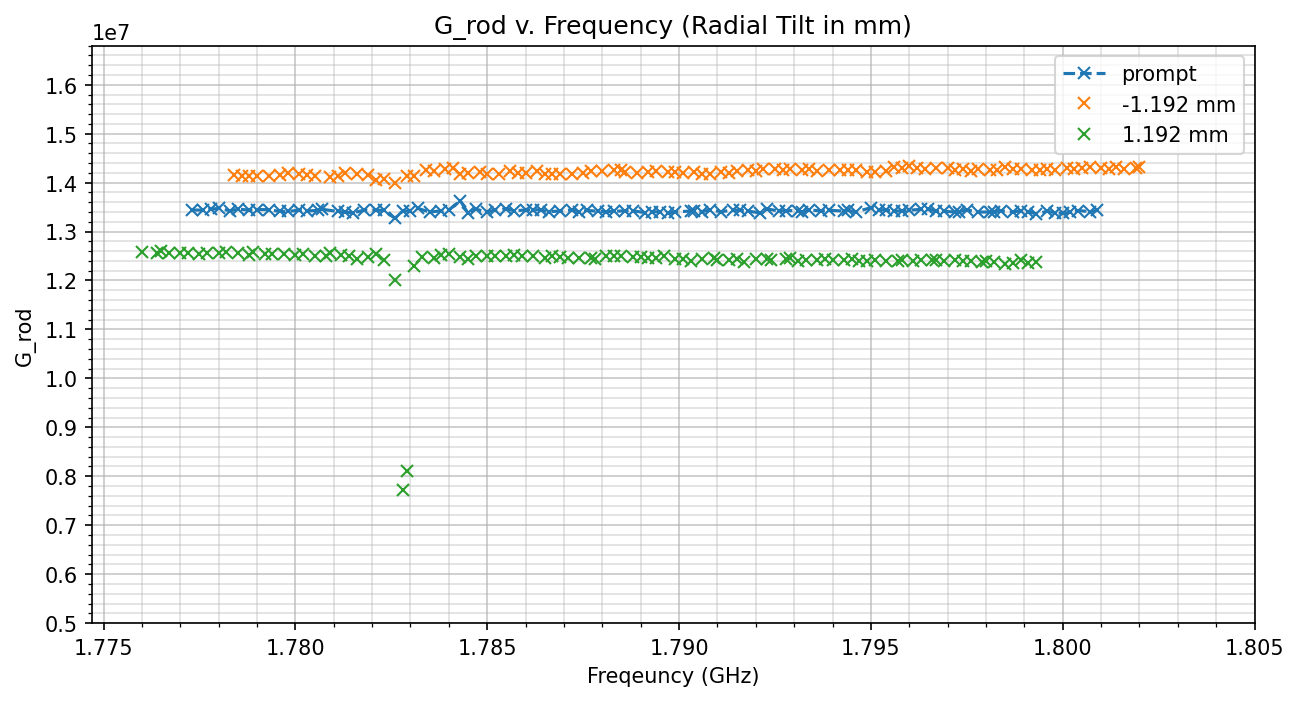

In [14]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   freq = data[v][1] # freq of prompt
   pmt = data[v][4] # Qrod of prompt
   label = '%f' % v
   if v == 0:
      label = 'prompt'
      axs.plot(freq,pmt,marker='x',linestyle = '--', label = label)
   else:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label)

axs.set_xticks(np.arange(1.775,1.805,0.005))
axs.set_xticks(np.arange(1.775,1.805,0.001),minor=True)

axs.set_yticks(np.arange(0.5e7,1.7e7,0.1e7))
axs.set_yticks(np.arange(0.5e7,1.7e7,0.2e6),minor=True)

axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend()
axs.set_ylabel('G_rod')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('G_rod v. Frequency (Radial Tilt in mm)')